<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Driver Code

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/gsck1.png',cv2.IMREAD_GRAYSCALE)

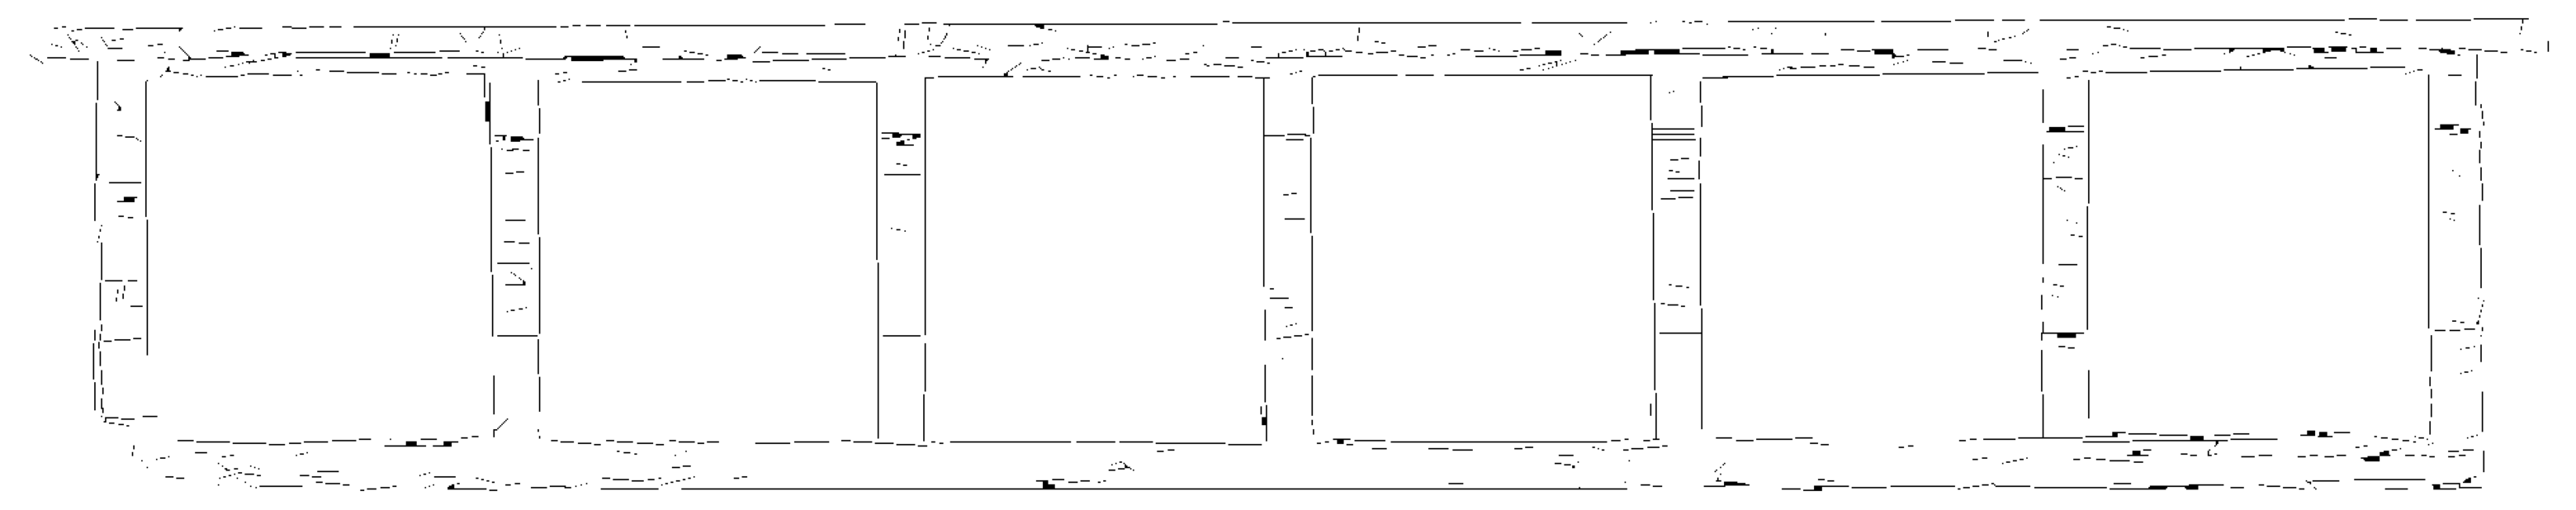

In [ ]:
disp(dil(dlsd(img),3))
#disp(dil(dlsd(ced(img)),5))

In [ ]:
# jpg_to_dxf(erd(dil(dlsd(img),3),3))
# dlsd(img)
jpg_to_dxf(dlsd(img))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Orignial Image


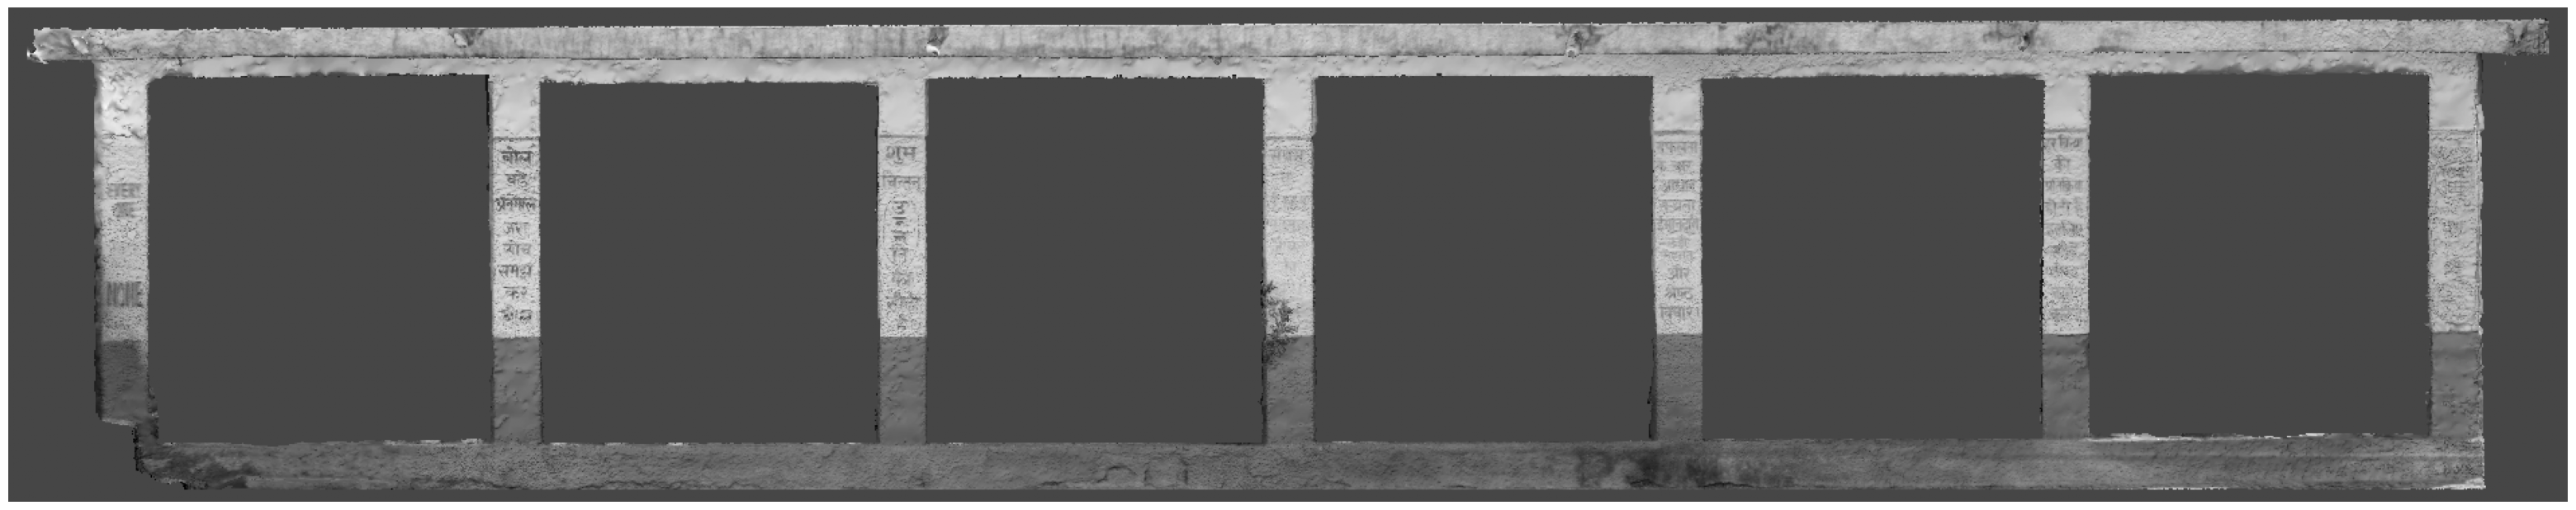

Custom Edge Detector


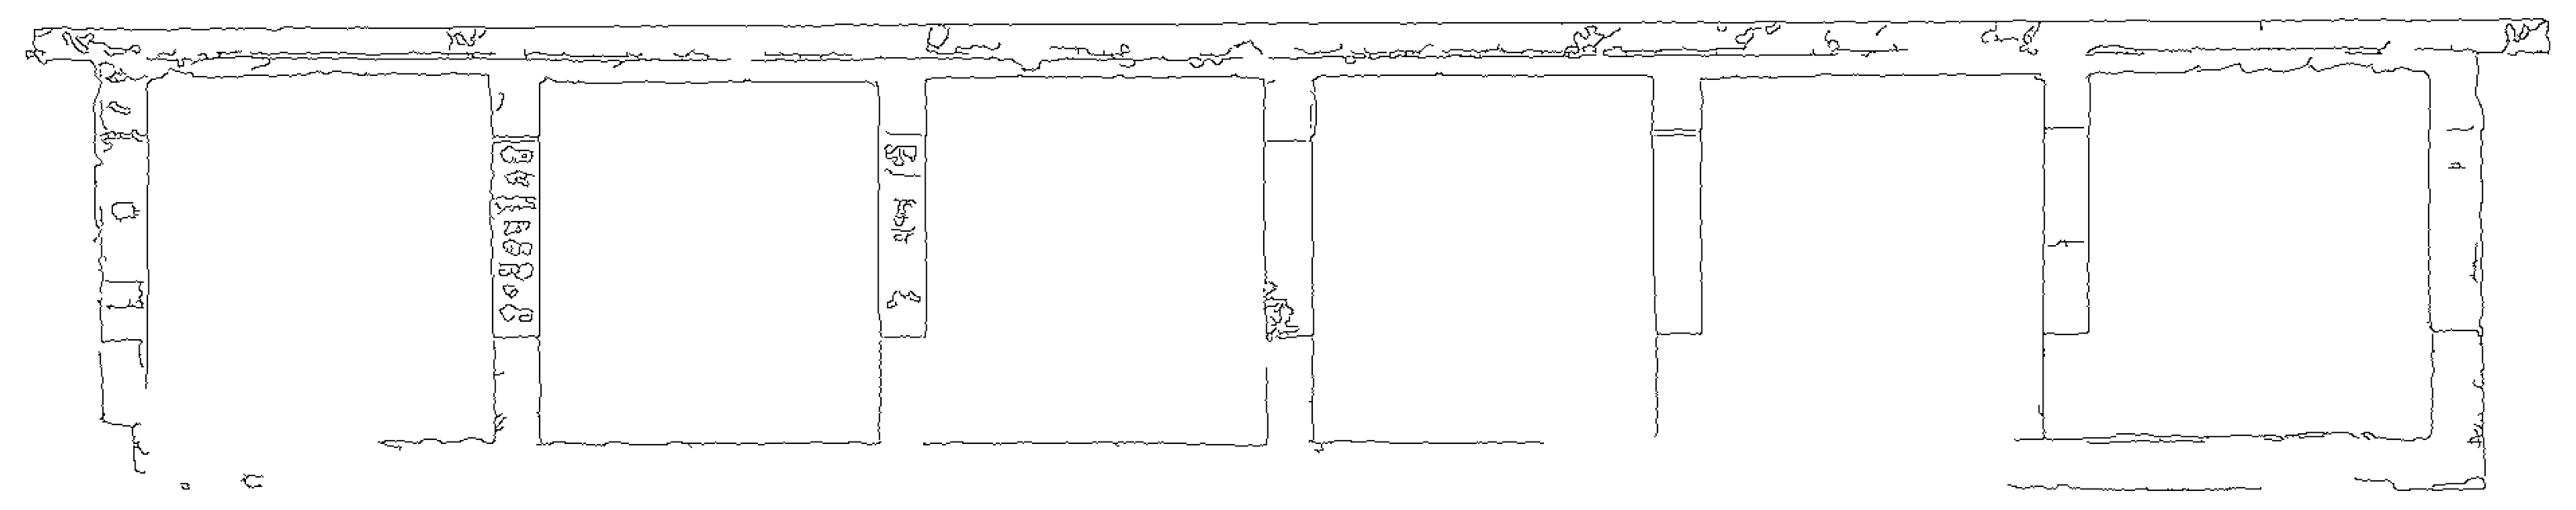

Default Line Segment Detector On Original Image


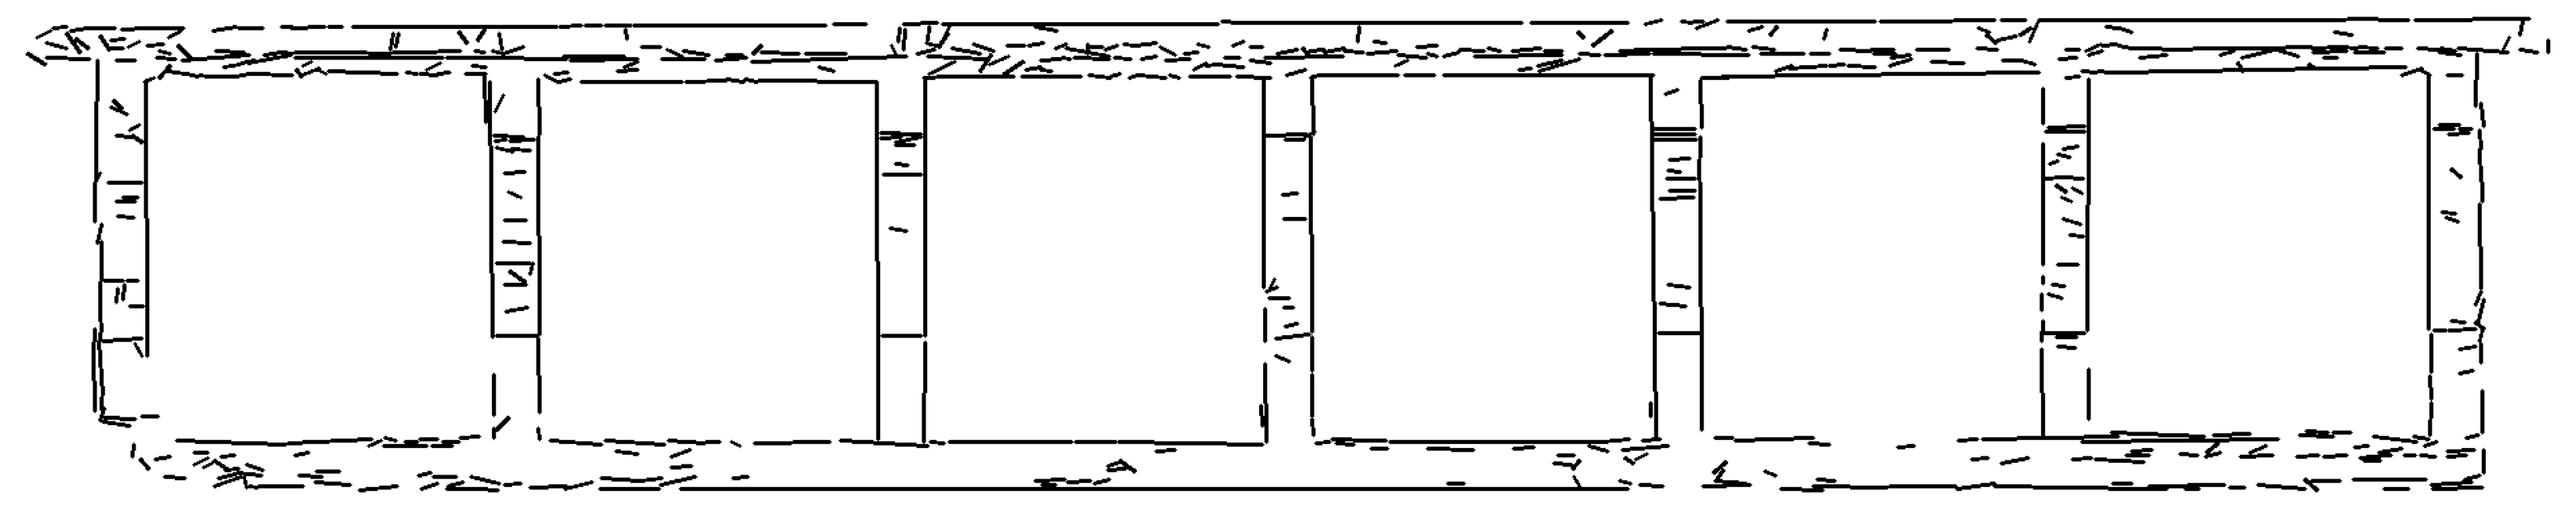

Default Line Segment Detector On Custom Edge Detector Image


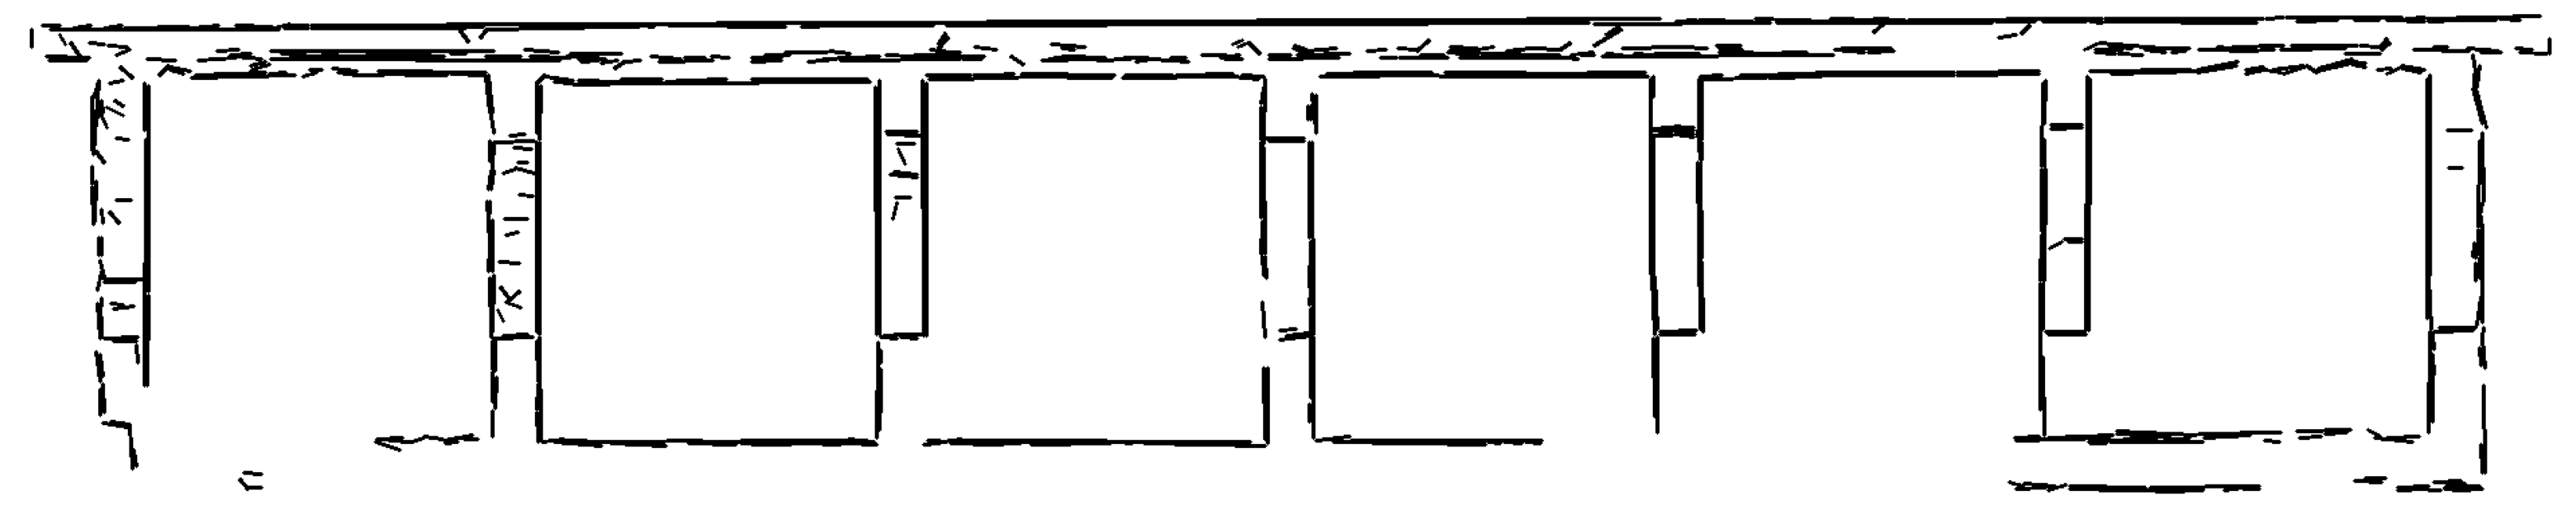

Custom Edge Detector on on Default Line Segment Detector Image


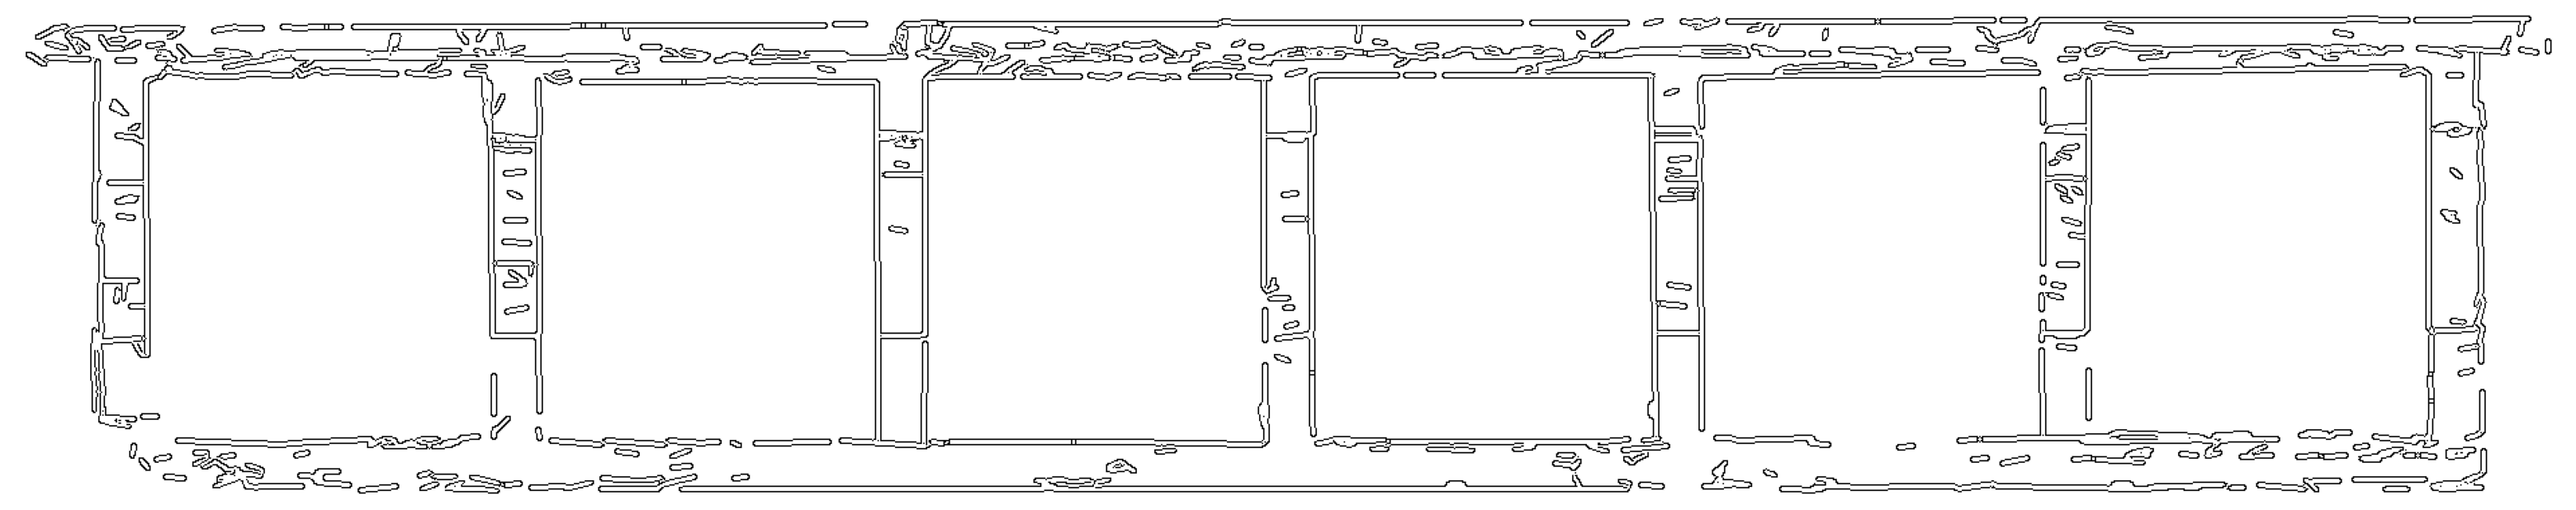

In [ ]:

print("Orignial Image")
disp(img)
print("Custom Edge Detector")
disp(ced(img))
print("Default Line Segment Detector On Original Image")
disp(dlsd(img))
print("Default Line Segment Detector On Custom Edge Detector Image")
disp(dlsd(ced(img)))
print("Custom Edge Detector on on Default Line Segment Detector Image")
disp(ced(dlsd(img)))

##Installing libraries

In [ ]:
!pip install svgwrite
!pip install ezdxf svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import svgwrite
import ezdxf
import svgpathtools
from google.colab import files
from skimage.morphology import skeletonize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

##Custom Edge Detector

In [ ]:
def ced(img):
  #kernel = np.ones((3,3), np.uint8)
  kernel2=np.ones((1,1), np.uint8)
  kernel = np.ones((1,1), np.uint8)

  a=1
  if(a!=0):
    im1=cv2.GaussianBlur(img,(7,7),0)

  im1=255-cv2.Canny(im1,40,120)

  dilated = cv2.dilate(im1, kernel, iterations=1)

  eroded = cv2.erode(im1, kernel, iterations=1)

  dilated = cv2.dilate(eroded, kernel2, iterations=1)

  return dilated


##Default Line Segment Detector

In [ ]:
def dlsd(img):
  # Load image (upload your own or use a sample)
  # image_path = "/content/drive/MyDrive/DATASETS/gsck1.png"  # Change this to your image path
  # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  #img = dilated.copy()
  # Create LSD detector

  img1=img.copy()
  lsd = cv2.createLineSegmentDetector(0)


  # Detect lines
  lines = lsd.detect(img)[0]

  # Create a black image of the same size
  lines_img = np.zeros_like(img1)

  # Draw detected lines in white
  for line in lines:
      x1, y1, x2, y2 = map(int, line[0])
      cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)  # White lines on black background

  return (255-lines_img)

##Custom Line Segment Detector

In [ ]:
def clsd(img):
# Tuned LSD Detector
  #https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gae0bba3b867a5f44d1b823aef4f57ee8d
  lsd = cv2.createLineSegmentDetector(
      refine=cv2.LSD_REFINE_ADV,
      scale=1.8,
      sigma_scale=1.9,
      quant=2.0,
      ang_th=45.0,
      density_th=0.7
  )

  # Detect lines
  lines = lsd.detect(img)[0]

  # Create an empty image
  lines_img = np.zeros_like(img)

  # Draw white lines on a black background
  for line in lines:
      x1, y1, x2, y2 = map(int, line[0])
      cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)

  return (255-lines_img)




##Display Function

In [ ]:
def disp(img):
  # Display results
  plt.figure(figsize=(40, 40))
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

##Jpg to DXF Converter

In [ ]:
def jpg_to_dxf(img):
  # Load the image
  # image = eroded.copy()
  image=img.copy()
  #image = img.copy()
  #image = 255- lines_img.copy()

  # Convert to binary (assuming black line on white background)
  _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

  # Find contours
  contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create SVG
  dwg = svgwrite.Drawing('filled_contours.svg', profile='tiny')

  # Fill the contours instead of just outlining them
  for contour in contours:
      path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour) + " Z"
      dwg.add(dwg.path(d=path_data, fill="black", stroke="none"))  # Filled black shape

  #dwg.save()



  # Apply erosion to shrink the filled shapes
  kernel = np.ones((1,1), np.uint8)  # 3x3 kernel
  eroded = cv2.erode(binary, kernel, iterations=3)  # Adjust iterations as needed

  # Save the eroded image for debugging
  #cv2.imwrite("eroded.png", eroded)


  # Find contours again after erosion
  contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a new SVG for the thinned result
  dwg = svgwrite.Drawing('thinned_lines.svg', profile='tiny')

  # Draw only the thinned (eroded) contours as a line
  for contour in contours:
      path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour)
      dwg.add(dwg.path(d=path_data, stroke="black", fill="none"))

  dwg.save()


  # Load the SVG file
  svg_file = "thinned_lines.svg"
  paths, attributes = svgpathtools.svg2paths(svg_file)

  # Determine SVG bounding box (height)
  svg_height = max(max(seg.start.imag, seg.end.imag) for path in paths for seg in path)

  # Create a new DXF document
  doc = ezdxf.new()
  msp = doc.modelspace()

  # Convert SVG paths to DXF polylines (flip Y-axis)
  for path in paths:
      dxf_points = [(seg.start.real, svg_height - seg.start.imag) for seg in path]  # Flip y-coordinates
      if dxf_points:
          msp.add_lwpolyline(dxf_points, close=False)  # Creates a lightweight polyline

  # Save DXF file
  dxf_file = "output.dxf"
  doc.saveas(dxf_file)

  # Automatically download the DXF file
  files.download(dxf_file)




##Dilation

In [ ]:
def dil(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(img, kernel, iterations=1)
    return dilated


##Erosion

In [ ]:

def erd(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded = cv2.erode(img, kernel, iterations=1)
    return eroded

##Skeletonize

In [ ]:

def skel(img):
    # Convert to binary (ensure input is binary)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    binary = binary // 255  # Convert to 0 and 1
    skeleton = skeletonize(binary)
    return (skeleton * 255).astype(np.uint8)  # Convert back to 0-255
